<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n20.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,24.260284,53.700617,5.936778,93.897679,87.339380,6.558299
1,0.0,1.0,87.824846,40.489969,-2.820944,135.493870,137.584274,-2.090404
2,0.0,2.0,92.955629,36.425803,-4.708889,134.672543,138.582717,-3.910174
3,0.0,3.0,30.680241,95.697534,7.932795,144.310570,136.603453,7.707117
4,0.0,4.0,21.741577,97.337407,2.229334,131.308318,129.315678,1.992640
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.856129,67.079164,-1.551972,154.383321,155.133221,-0.749899
119996,999.0,116.0,85.448087,94.331950,-5.942303,183.837734,188.981013,-5.143279
119997,999.0,117.0,21.923799,59.366272,-5.631186,85.658886,89.921127,-4.262241
119998,999.0,118.0,84.006357,52.944574,1.697792,148.648724,146.235357,2.413367


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,24.260284,53.700617,5.936778,93.897679,87.339380,6.558299
1,0.0,1.0,87.824846,40.489969,-2.820944,135.493870,137.584274,-2.090404
2,0.0,2.0,92.955629,36.425803,-4.708889,134.672543,138.582717,-3.910174
3,0.0,3.0,30.680241,95.697534,7.932795,144.310570,136.603453,7.707117
4,0.0,4.0,21.741577,97.337407,2.229334,131.308318,129.315678,1.992640
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.856129,67.079164,-1.551972,154.383321,155.133221,-0.749899
119996,999.0,116.0,85.448087,94.331950,-5.942303,183.837734,188.981013,-5.143279
119997,999.0,117.0,21.923799,59.366272,-5.631186,85.658886,89.921127,-4.262241
119998,999.0,118.0,84.006357,52.944574,1.697792,148.648724,146.235357,2.413367


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    24.260284  53.700617  5.936778   93.897679   87.339380  6.558299
      1.0    87.824846  40.489969 -2.820944  135.493870  137.584274 -2.090404
      2.0    92.955629  36.425803 -4.708889  134.672543  138.582717 -3.910174
      3.0    30.680241  95.697534  7.932795  144.310570  136.603453  7.707117
      4.0    21.741577  97.337407  2.229334  131.308318  129.315678  1.992640
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.856129  67.079164 -1.551972  154.383321  155.133221 -0.749899
      116.0  85.448087  94.331950 -5.942303  183.837734  188.981013 -5.143279
      117.0  21.923799  59.366272 -5.631186   85.658886   89.921127 -4.262241
      118.0  84.006357  52.944574  1.697792  148.648724  146.235357  2.413367
      119.0  78.964325  89.474348  6.752364  185.191037  177.584539  7.606498

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    24.260284  53.700617  5.936778   93.897679   87.339380  6.558299
      1.0    87.824846  40.489969 -2.820944  135.493870  137.584274 -2.090404
      2.0    92.955629  36.425803 -4.708889  134.672543  138.582717 -3.910174
      3.0    30.680241  95.697534  7.932795  144.310570  136.603453  7.707117
      4.0    21.741577  97.337407  2.229334  131.308318  129.315678  1.992640
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.856129  67.079164 -1.551972  154.383321  155.133221 -0.749899
      116.0  85.448087  94.331950 -5.942303  183.837734  188.981013 -5.143279
      117.0  21.923799  59.366272 -5.631186   85.658886   89.921127 -4.262241
      118.0  84.006357  52.944574  1.697792  148.648724  146.235357  2.413367
      119.0  78.964325  89.474348  6.752364  185.191037  177.584539  7.606498

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,24.260284,53.700617,5.936778,93.897679,87.339380,6.558299
1,0.0,1.0,87.824846,40.489969,-2.820944,135.493870,137.584274,-2.090404
2,0.0,2.0,92.955629,36.425803,-4.708889,134.672543,138.582717,-3.910174
3,0.0,3.0,30.680241,95.697534,7.932795,144.310570,136.603453,7.707117
4,0.0,4.0,21.741577,97.337407,2.229334,131.308318,129.315678,1.992640
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.856129,67.079164,-1.551972,154.383321,155.133221,-0.749899
119996,999.0,116.0,85.448087,94.331950,-5.942303,183.837734,188.981013,-5.143279
119997,999.0,117.0,21.923799,59.366272,-5.631186,85.658886,89.921127,-4.262241
119998,999.0,118.0,84.006357,52.944574,1.697792,148.648724,146.235357,2.413367


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    24.260284  53.700617  5.936778   93.897679   87.339380  6.558299
      1.0    87.824846  40.489969 -2.820944  135.493870  137.584274 -2.090404
      2.0    92.955629  36.425803 -4.708889  134.672543  138.582717 -3.910174
      3.0    30.680241  95.697534  7.932795  144.310570  136.603453  7.707117
      4.0    21.741577  97.337407  2.229334  131.308318  129.315678  1.992640
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.856129  67.079164 -1.551972  154.383321  155.133221 -0.749899
      116.0  85.448087  94.331950 -5.942303  183.837734  188.981013 -5.143279
      117.0  21.923799  59.366272 -5.631186   85.658886   89.921127 -4.262241
      118.0  84.006357  52.944574  1.697792  148.648724  146.235357  2.413367
      119.0  78.964325  89.474348  6.752364  185.191037  177.584539  7.606498

[120000 rows x 6 columns]

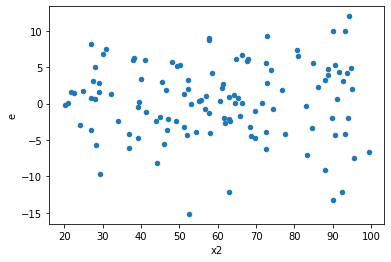

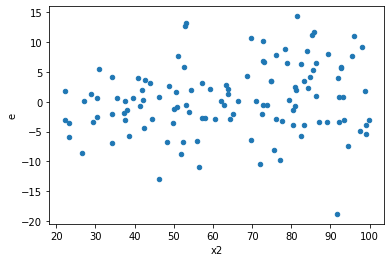

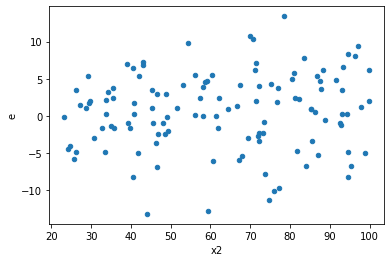

In [17]:
tablenew0 = table.loc[6.0]
tablenew1 = table.loc[14.0]
tablenew2 = table.loc[15.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,862.8601252739363,1729.3297889220516,18.757828810302964,37.594125846131554,2.004183225378543,0.020231915961986813,0.9898840420190066,0.010115957980993406,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,564.1865103286209,1165.8690930779032,12.264924137578715,25.344980284302245,2.066460419974985,0.01542961246115282,0.9922851937694236,0.00771480623057641,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,1003.3922186567574,1276.9606163629505,21.812874318625163,27.760013399194577,1.2726435312329005,0.4166826230967149,0.7916586884516426,0.20834131154835744,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,861.3620689650173,1389.6271734619522,18.725262368804724,30.209286379607658,1.6132904193606759,0.10836761564665465,0.9458161921766727,0.054183807823327323,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,795.2071324931399,1261.8656016657953,17.28711157593782,27.43186090577816,1.5868388877619648,0.12100591147381001,0.939497044263095,0.060502955736905006,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,647.7062824506911,1623.9846390214996,14.08057135762372,35.30401389177173,2.5072856061808095,0.0023004009377129986,0.9988497995311435,0.0011502004688564993,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,857.38686939268,1334.589207290533,18.63884498679739,29.012808854142023,1.556577613832451,0.13716431988481004,0.931417840057595,0.06858215994240502,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,924.8933976730552,1147.3228033887463,20.10637821028381,24.941800073668396,1.240491938071244,0.4677377007176573,0.7661311496411713,0.23386885035882865,Reject001=1 : Homoscedasticity
9.0,46.0,46.0,993.6168138268683,1422.270835047219,21.600365517975398,30.918931196678674,1.4314077773799037,0.22763352813691173,0.8861832359315441,0.11381676406845587,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,862.8601252739363,1729.3297889220516,18.757828810302964,37.594125846131554,2.004183225378543,0.020231915961986813,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,564.1865103286209,1165.8690930779032,12.264924137578715,25.344980284302245,2.066460419974985,0.01542961246115282,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,1003.3922186567574,1276.9606163629505,21.812874318625163,27.760013399194577,1.2726435312329005,0.4166826230967149,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,912.3280523960984,882.9898302676406,19.833218530349967,19.195431092774797,0.9678424640660723,0.9122188213450185,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,861.3620689650173,1389.6271734619522,18.725262368804724,30.209286379607658,1.6132904193606759,0.10836761564665465,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,795.2071324931399,1261.8656016657953,17.28711157593782,27.43186090577816,1.5868388877619648,0.12100591147381001,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,647.7062824506911,1623.9846390214996,14.08057135762372,35.30401389177173,2.5072856061808095,0.0023004009377129986,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,857.38686939268,1334.589207290533,18.63884498679739,29.012808854142023,1.556577613832451,0.13716431988481004,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,924.8933976730552,1147.3228033887463,20.10637821028381,24.941800073668396,1.240491938071244,0.4677377007176573,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      843
Reject001=0 : Heteroscedasticity    157
Name: Result_test, dtype: int64